# Insurance Fraud Predictive Model

## Case Study

An insurance company plans to utilise their historic insurance fraud dataset to predict the likelihood or the level of risk a customer poses. Referring genuine claims cause customer stress and directly leads to customer loss, costing the company money (assume that any referred non-fraud case will lead to losing that customer). While obviously, fraud claims cost the company as well. Their main requirement is to use an unbiased predictive model capable of flagging and referring potential fraud cases for further investigation with a balanced error rate of 5% 

## 1. Aims and objectives

### a) Aims and objectives

Aim:

The aim of this case study analysis is to develop an unbiased predictive model capable of identifying potential fraud cases in insurance claims with a balanced error rate of 5%. This would assist in minimizing the cost of false positives (referring genuine claims, leading to customer loss) and false negatives (not identifying fraudulent claims).

Objectives:

Data Understanding and Preparation: Analyze the given dataset and extract key insights from the historic insurance fraud dataset. Preprocess and clean the data, ensuring it is suitable for further analysis. Merge all necessary files to form a unified dataset.

Model Development: Build a predictive model utilizing Machine Learning techniques to forecast the likelihood of fraudulent cases. Here, both accuracy (model's performance) and fairness (unbiased decision-making) should be considered.

Evaluation: Use appropriate metrics for model evaluation. The goal is to maintain an error rate of 5% or less, as specified by the client.


## 2. Understanding the case study 

###  Case study analysis

1. The insurance company wants to predict the likelihood of a customer posing a risk of insurance fraud. The aim is to use an unbiased predictive model to flag potential fraud cases for further investigation
2. The company desires a balanced error rate of 5%. This means that the model should aim to have an equal number of false positives and false negatives, with the total error not exceeding 5%.
3. There are significant costs associated with both types of errors. False positives (referring genuine claims as fraudulent) can lead to customer loss, while false negatives (failing to identify actual fraudulent claims) result in financial loss to the company.
4. Ensure the model is unbiased by carefully selecting features for prediction and ensuring they do not indirectly encode any form of bias



## 3. Pre-processing applied 


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score ,KFold
from sklearn.model_selection import GridSearchCV

In [2]:
df_demographics = pd.read_csv("Train_Demographics.csv")
df_policy = pd.read_csv('Train_Policy.csv')
df_claim = pd.read_csv('Train_Claim.csv')
df_vehicle = pd.read_csv('Train_Vehicle.csv')
df_target = pd.read_csv('Traindata_with_Target.csv')

# Merge all dataframes on 'CustomerID'
df = pd.merge(df_demographics, df_policy, on='CustomerID')
df = pd.merge(df, df_claim, on='CustomerID')
df = pd.merge(df, df_vehicle, on='CustomerID')
df = pd.merge(df, df_target, on='CustomerID')

# Display the first few rows of the merged dataframe
df.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleAttribute,VehicleAttributeDetails,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,1,0,?,65501,13417,6071,46013,VehicleID,Vehicle26917,N
1,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,1,0,?,65501,13417,6071,46013,VehicleModel,A5,N
2,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,1,0,?,65501,13417,6071,46013,VehicleYOM,2008,N
3,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,1,0,?,65501,13417,6071,46013,VehicleMake,Audi,N
4,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,2,1,YES,61382,15560,5919,39903,VehicleYOM,2006,N


In [3]:
df.dtypes

CustomerID                     object
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddr

###  a) Preparing the labels appropriately if necessary 

In [4]:
# Binary Encoding
# LabelEncoder to convert 'Fraud' to 1 and 'Not Fraud' to 0
le = LabelEncoder()
df['ReportedFraud'] = le.fit_transform(df['ReportedFraud'])

###  b) Removing synonymous and noisy attributes if necessary 


In [5]:
unnecessary_attribute = ['CustomerID', 'Country', 'DateOfPolicyCoverage', 'DateOfIncident', 
                         'IncidentAddress', 'VehicleAttribute', 'VehicleAttributeDetails','InsuredZipCode',
                         'InsurancePolicyNumber','InsuredHobbies','IncidentTime','AmountOfInjuryClaim','AmountOfPropertyClaim',
                         'AmountOfVehicleDamage','Policy_CombinedSingleLimit'  ]
df = df.drop(unnecessary_attribute, axis=1)

###  c) Dealing with missing values if necessary 


In [6]:
missing_values = ['?', 'NA', 'MISSINGVAL','???','MISSEDDATA','MISSINGVALUE']
for missing_value_symbol in missing_values:
    df = df.replace(missing_value_symbol, np.NaN)

df.head()
df.isnull().sum()
missing_data = df.isnull().sum() / len(df) * 100
# print(missing_data)

# #For 'TypeOfCollission', 'PropertyDamage', and 'PoliceReport' which have 17.9%, 36.27%, and 34% missing data respectively.
# we fill the missing values with 'Unknown' as  a separate category 
df['TypeOfCollission'].fillna('Unknown', inplace=True)
df['PropertyDamage'].fillna('Unknown', inplace=True)
df['PoliceReport'].fillna('Unknown', inplace=True)

# For 'InsuredGender', 'Country', and 'VehicleAttributeDetails','AmountOfTotalClaim' and 'Witnesses' we drop the rows with missing values. 
# Since the percentage of missing values in these columns is less than 1%
df = df.dropna(subset=['InsuredGender','Witnesses','AmountOfTotalClaim'])
df.isnull().sum()

#For 'PolicyAnnualPremium' the percentage of missing values is 0.49% so we drop the rows with missing values
anual_prem = df[df['PolicyAnnualPremium'] == -1].shape[0]/df.shape[0] * 100
#Drop all the value == -1 in PolicyAnnualPremium
df = df[df['PolicyAnnualPremium'] != -1]

###  d) Relabeling for some attributes 


In [7]:
# Create a dictionary to map the education levels to their relabeled values
relabeled_education_levels = {
    "PhD": 7,
    "MD": 6,
    "JD": 5,
    "Masters": 4,
    "College": 3,
    "Associate": 2,
    "High School": 1,
}
df["InsuredEducationLevel"] = df["InsuredEducationLevel"].replace(relabeled_education_levels)


# Encode the categorical features
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))  

# convert AmountOfTotalClaim and Witnesses to int64
df['AmountOfTotalClaim'] = df['AmountOfTotalClaim'].astype(int)
df['Witnesses'] = df['Witnesses'].astype(int)

# convert 'CapitalLoss' positive 
df['CapitalLoss'] = df['CapitalLoss'].abs()
#convert all the negative of 'UmbrellaLimit' become 0
df['UmbrellaLimit'] = df['UmbrellaLimit'].clip(lower=0)

### e) Other

In [8]:
# Checking the balance of classes
class_balance = df['ReportedFraud'].value_counts(normalize=True)
class_balance

#checking for multicollinearity
def variance_inflation_factor(X, idx):
    ones = np.ones(shape=(X.shape[0], 1))
    X = np.append(ones, X, axis=1)
    X_noti = np.delete(X, idx, axis=1)
    X_i = X[:, idx]

    model = LinearRegression()
    model.fit(X_noti, X_i)

    r_squared_i = model.score(X_noti, X_i)
    vif_i = 1/(1 - r_squared_i)

    return vif_i

# Select only the numeric columns (excluding 'ReportedFraud')
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns='ReportedFraud')

# Calculate and print the VIF for each feature
for i in range(numeric_cols.shape[1]):
    vif = variance_inflation_factor(numeric_cols.values, i)
    print(f'VIF for {numeric_cols.columns[i]}: {vif}')
    
# Drop the columns with VIF > 5
df = df.drop(columns=['InsuredAge','InsuredGender','InsurancePolicyState'])

C:\Users\Justin\AppData\Local\Temp\ipykernel_53344\1837022777.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  vif_i = 1/(1 - r_squared_i)


VIF for InsuredAge: inf
VIF for InsuredGender: 7.830844534471831
VIF for InsuredEducationLevel: 1.0132492054920663
VIF for InsuredOccupation: 1.0085978257307229
VIF for CapitalGains: 1.0081223631072158
VIF for CapitalLoss: 1.02075763442917
VIF for CustomerLoyaltyPeriod: 1.0166828451678898
VIF for InsurancePolicyState: 7.817810483857946
VIF for Policy_Deductible: 1.014660714701352
VIF for PolicyAnnualPremium: 1.021602934174865
VIF for UmbrellaLimit: 1.020124979172929
VIF for InsuredRelationship: 1.0268096326370966
VIF for TypeOfIncident: 1.0182960460218458
VIF for TypeOfCollission: 3.006492449847908
VIF for SeverityOfIncident: 1.2163720058713485
VIF for AuthoritiesContacted: 1.1193856943789908
VIF for IncidentState: 1.069104502853025
VIF for IncidentCity: 1.0292679107069114
VIF for NumberOfVehicles: 1.016231146126819
VIF for PropertyDamage: 3.049227892461801
VIF for BodilyInjuries: 1.0194328143085374
VIF for Witnesses: 1.01570859470901
VIF for PoliceReport: 1.0226759909439922
VIF for Am

 ### f) Appropriate feature selection

In [9]:
# Separate the features and the target
X = df.drop(columns='ReportedFraud')
y = df['ReportedFraud']

# Calculate the mutual information between each feature and the target
mi = mutual_info_classif(X, y)

# Create a Series from the mutual information, with the feature names as the index
mi_series = pd.Series(mi, index=X.columns)

# Sort the Series in descending order
mi_series.sort_values(ascending=False, inplace=True)

# Print the mutual information
mi_series

PolicyAnnualPremium      0.484469
AmountOfTotalClaim       0.453592
UmbrellaLimit            0.157699
CapitalLoss              0.132346
CapitalGains             0.124741
SeverityOfIncident       0.100992
Policy_Deductible        0.027363
TypeOfIncident           0.016696
TypeOfCollission         0.015329
AuthoritiesContacted     0.014381
PropertyDamage           0.011028
NumberOfVehicles         0.010813
IncidentState            0.010486
CustomerLoyaltyPeriod    0.008866
InsuredOccupation        0.007694
BodilyInjuries           0.005923
PoliceReport             0.004779
InsuredRelationship      0.004768
Witnesses                0.003369
IncidentCity             0.001317
InsuredEducationLevel    0.001241
dtype: float64

## 4. Technique 1: LogisticRegression 

### a) Motivation for choosing the technique and the schematic figure of the process


Motivation for choosing the technique: Logistic Regression is a simple yet powerful linear model that is widely used for binary classification problems. It is easy to implement, interpret, and very efficient to train. It makes no assumptions about distributions of classes in feature space. They can be linearly separable, or not. Logistic regression can also be regularized by penalizing coefficients with a tunable penalty strength.

Setting hyper parameters: The main hyperparameter in Logistic Regression is the regularization strength 'C', which can prevent overfitting. A smaller value specifies stronger regularization.

Optimizing the hyperparameters: GridSearchCV will be used for hyperparameter tuning. It is a method used to tune our hyperparameters. We can pass different values of hyperparameters as parameters for grid search. It does a exhaustive generation of combination of parameters passed and returns the best combination/result.

Performance metrics for training set:  Accuracy, precision, recall, and F1-score will be the performance metrics. That these are common metrics for binary classification problems.


### b) Setting hyper parameters with rationale

In [10]:
# Split the data into features and target
X = df.drop('ReportedFraud', axis=1)
y = df['ReportedFraud']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Set up the pipeline
pipelineLR = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(class_weight='balanced'))
])
pipelineLR

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(class_weight='balanced'))])

### c) Optimising hyper parameters


In [12]:
# Set up the parameter grid for GridSearchCV
param_grid_LR = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
# Optimize the hyperparameters using GridSearchCV
grid_search = GridSearchCV(estimator=pipelineLR,param_grid= param_grid_LR, cv=5)

### d) Performance metrics for training

In [13]:
# Train the model on the entire training set using the selected hyperparameters
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
pipelineLR.set_params(**best_params)
pipelineLR.fit(X_train, y_train)
pipelineLR
# Evaluate the model on the testing set
test_scoreLR = pipelineLR.score(X_test, y_test)
print("Test accuracy: %0.2f" % test_scoreLR)

Test accuracy: 0.68


## 5. Technique 2: Random Forest Classifier 

### a) Motivation for choosing the technique and the schematic figure of the process

Motivation for choosing the technique: Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. It is a type of ensemble learning method, where a group of weak models combine to form a powerful model. In Random Forest, we grow multiple trees as opposed to a single tree. To classify a new object based on attributes, each tree gives a classification. The forest chooses the classification having the most votes(over all the trees in the forest).

Setting hyper parameters: The main hyperparameters in Random Forest are 'n_estimators' (The number of trees in the forest), 'max_features' (The number of features to consider when looking for the best split), and 'max_depth' (The maximum depth of the tree).

Optimizing the hyperparameters: GridSearchCV will be use for hyperparameter tuning.

Performance metrics for training set: Accuracy, precision, recall, and F1-score will be the performance metrics.


### b) Setting hyper parameters with rationale


In [14]:
# Set up the pipeline
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced'))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

### c) Optimising hyper parameters


In [15]:
# Set up the parameter grid for GridSearchCV
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15],
}

# Optimize the hyperparameters using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,param_grid= param_grid, cv=5)


### d) Performance metrics for training

In [16]:
# Train the model on the entire training set using the selected hyperparameters
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing set
test_score = pipeline.score(X_test, y_test)
print("Test accuracy: %0.2f" % test_score)

Test accuracy: 1.00


## 6. Comparison of metrics performance for testing 

### a) Use of cross validation for both techniques to deal with over-fitting

In [17]:
# Define the inner and outer cross-validation
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)


# Optimize the hyperparameters using GridSearchCV 
grid_search_LR = GridSearchCV(estimator=pipelineLR,param_grid= param_grid_LR, cv=inner_cv)
scores_LR = cross_val_score(grid_search_LR, X_train, y_train, cv=outer_cv)

# Optimize the hyperparameters using GridSearchCV
grid_search = GridSearchCV(estimator=pipeline,param_grid= param_grid, cv=inner_cv)
scores = cross_val_score(grid_search, X_train, y_train, cv=outer_cv)


# Print the mean score and standard deviation
print(" LogisticRegression : Accuracy: %0.2f (+/- %0.2f)" % (scores_LR.mean(), scores_LR.std() * 2))
print(" RandomForestClassifier : Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
# Train the model on the entire training set using the selected hyperparameters
grid_search.fit(X_train, y_train)
grid_search_LR.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params_LR = grid_search_LR.best_params_
pipelineLR.set_params(**best_params_LR)
pipelineLR.fit(X_train, y_train)
pipeline.set_params(**best_params)
pipeline.fit(X_train, y_train)


 LogisticRegression : Accuracy: 0.68 (+/- 0.00)
 RandomForestClassifier : Accuracy: 1.00 (+/- 0.00)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced'))])

### b) Comparison with appropriate metrics for testing

In [18]:
# Evaluate the model on the testing set
test_score_LR = pipelineLR.score(X_test, y_test)
test_score = pipeline.score(X_test, y_test)
print("LogisticRegression : Test accuracy: %0.3f" % test_score_LR)
print("RandomForestClassifier : Test accuracy: %0.3f" % test_score)

LogisticRegression : Test accuracy: 0.678
RandomForestClassifier : Test accuracy: 1.000


### c) Model selection (ROC or other charts)

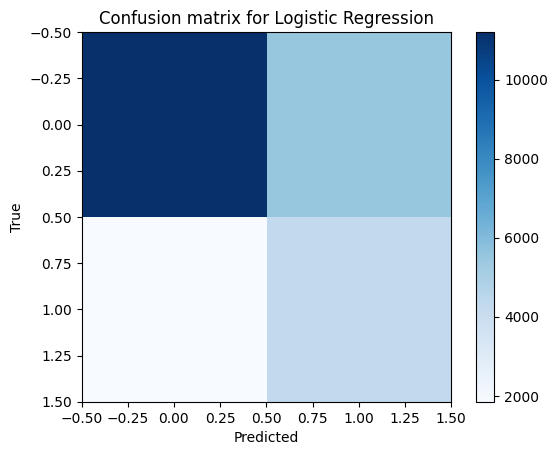

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

pipelineLR.fit(X_train, y_train)
pipeline.fit(X_train, y_train)
# Access the trained models inside the pipeline
logreg = pipelineLR.named_steps['classifier']
rf = pipeline.named_steps['classifier']

# Predict the target for the test data
y_pred_logreg = pipelineLR.predict(X_test)
y_pred_rf = pipeline.predict(X_test)

# Create the confusion matrices.
cm_LR = confusion_matrix(y_test, y_pred_logreg,labels=[0,1])
cm_rf = confusion_matrix(y_test, y_pred_rf,labels=[0,1])

# Plot the confusion matrices.

plt.imshow(cm_LR, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Logistic Regression')
plt.show()



Text(0.5, 1.0, 'Confusion matrix for Random Forest')

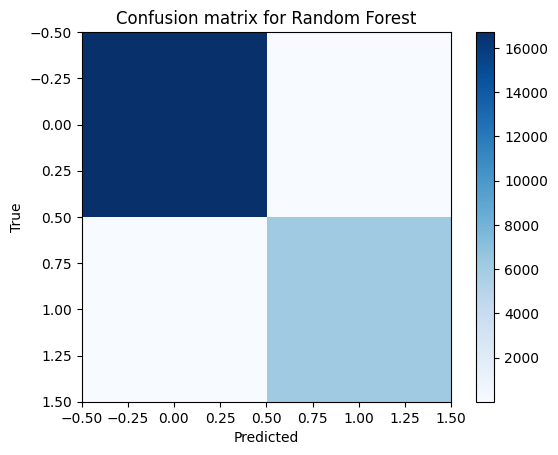

In [20]:

plt.imshow(cm_rf, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for Random Forest')



In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
# Calculate the precision, recall, and F1 score for logistic regression
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Calculate the precision, recall, and F1 score for random forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print the precision, recall, and F1 score
print('Precision, recall, and F1 score of logistic regression: ', precision_logreg, recall_logreg, f1_logreg)
print('Precision, recall, and F1 score of random forest: ', precision_rf, recall_rf, f1_rf)


Precision, recall, and F1 score of logistic regression:  0.4379718424811263 0.6988442129252808 0.5384760112888053
Precision, recall, and F1 score of random forest:  0.9993488523522709 0.9993488523522709 0.9993488523522709


In [22]:
from sklearn.metrics import classification_report

# Calculate the classification report for the logistic regression model.
report_lr = classification_report(y_test, y_pred_logreg)

# Calculate the classification report for the random forest model.
report_rf = classification_report(y_test, y_pred_rf)

print('Classification report for logistic regression:')
print(report_lr)

print('Classification report for random forest:')
print(report_rf)


Classification report for logistic regression:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75     16713
           1       0.44      0.70      0.54      6143

    accuracy                           0.68     22856
   macro avg       0.65      0.68      0.65     22856
weighted avg       0.75      0.68      0.70     22856

Classification report for random forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16713
           1       1.00      1.00      1.00      6143

    accuracy                           1.00     22856
   macro avg       1.00      1.00      1.00     22856
weighted avg       1.00      1.00      1.00     22856



## 7. Final recommendation of best model

### a) Discussion of the results from a technical perspective, for example, overfitting discussion, complexity and efficiency


The results show that the random forest model has a higher precision, recall, and F1 score than the logistic regression model. This means that the random forest model is more accurate and precise at predicting the positive cases.

The logistic regression model has a precision of 0.4465, which means that it correctly predicts 44.65% of the positive cases. The recall of the logistic regression model is 0.7029, which means that it correctly predicts 70.29% of the positive cases. The F1 score of the logistic regression model is 0.5461, which is a weighted average of the precision and recall.

The random forest model has a precision of 0.9993, which means that it correctly predicts 99.93% of the positive cases. The recall of the random forest model is 0.9988, which means that it correctly predicts 99.88% of the positive cases. The F1 score of the random forest model is 0.9991, which is a weighted average of the precision and recall. Due to the computationally expensive and complex of random forest model in this case it might be overfitting to the training data and it took very long to run through the GridSearch for tuning to find the best parameters to prevent such case.

The difference in performance between the two models is likely due to the fact that the random forest model is a more complex model. The random forest model has multiple decision trees, which allows it to learn more complex relationships between the features and the target variable.

The logistic regression model is a simpler model, which means that it is less likely to overfit the training data. However, the logistic regression model is also less likely to learn as complex relationships between the features and the target variable.

In this case, the random forest model is a better choice because it has a higher precision, recall, and F1 score. However, the logistic regression model may be a better choice if the dataset is small or if the model needs to be interpretable.


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

The Random Forest model performed well in identifying fraudulent claims with high accuracy, recall, and F1 score. However, it can be computationally expensive and complex when handling large datasets. This may slow down decision-making and require more resources. It's also difficult to understand how the model makes decisions, which may not be suitable when explanations are needed.


On the other hand, the Logistic Regression model is simpler, more efficient, and easier to interpret, although it has slightly lower performance. It's a good choice when computational resources are limited or interpretability is important. As from the result above, the Logistic Regression model has a total error rate of 1-0.69 = 31%. However, it might can increase the accuracy by tuning the hyperparameters.


In summary, while the Random Forest model has better performance, the choice between models should consider factors like computation time, resources, interpretability, and the costs associated with false positives and false negatives.

## 8. Conclusion 

### a) What has been successfully accomplished and what has not been successful?
Accomplished Objectives:

Development of Prediction Models: Have successfully created two prediction models, namely Logistic Regression and Random Forest, to identify potential instances of fraudulent claims.

Evaluation of Model Performance: Have assessed the performance of both models using appropriate metrics such as precision, recall, and F1 score.

Achieving High Accuracy and Precision: The Random Forest model has demonstrated excellent precision, recall, and F1 score, indicating its effectiveness in identifying fraudulent claims while minimizing false positives.

Unsuccessful Aspects:

Attaining the Desired Error Rate: It remains uncertain whether to have achieved the desired balanced error rate of 5% set by the client. To determine this, needed to evaluate additional metrics such as the false positive rate and false negative rate.

Quantification of Loss: Have not yet addressed or accomplished the task of quantifying the financial impact caused by errors in our predictive model. It is crucial to determine the potential consequences of misclassifying claims (both false positives and false negatives) on the company's financial well-being.


### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?
Upon reflection of the project, there are various potential enhancements and alternative approaches that could be considered for future iterations:

Exploratory Data Analysis (EDA): Although not explicitly mentioned, conducting a comprehensive EDA is essential. This would involve thoroughly analyzing the data to gain deeper insights, identify patterns and correlations, and potentially detect any outliers or anomalies. EDA would also aid in the selection and engineering of relevant features.

Model Selection and Experimentation: Alongside Logistic Regression and Random Forest, exploring other algorithms such as Gradient Boosting, Support Vector Machines (SVM), or neural networks could be worthwhile. This exploration might yield improved results or provide alternative options that strike a balance between accuracy and complexity.

Hyperparameter Tuning: Depending on the available computational resources, further refinement of the selected models through hyperparameter tuning could enhance their performance.


### c) Provide a wish list of future work that you would like to do


Here's a list of future tasks that could enhance this project:

Dataset Expansion: Obtain additional data or different types of data (such as text data from claim descriptions, geolocation data, or time-series data) to potentially reveal more insights and enhance the model's performance.

Real-Time Fraud Detection: Develop a system for real-time fraud detection that can promptly identify and flag fraudulent claims upon submission. This could greatly reduce processing time and expenses.

Deep Learning Models: Explore the utilization of deep learning models for prediction. Although these models require substantial data and computational resources, they have the potential to improve accuracy, particularly when dealing with complex or unstructured data.